# Predict Salary
## Steps performed:
* Label-encoding
* Scaling
* GridSearch with CV=10
* fit AdaBoostRegressor
* Predict using MSE metric

In [2]:
import pandas as pd
%matplotlib inline
import seaborn as sb
from matplotlib import pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error

In [3]:
trainFeatures = pd.read_csv("./train_features.csv",index_col="jobId")
trainSalaries = pd.read_csv("./train_salaries.csv",index_col="jobId")
trainFinal = trainFeatures.join(trainSalaries)
testFeatures = pd.read_csv("./test_features.csv", index_col="jobId")


## Lets explore the train data

116.06137563810069


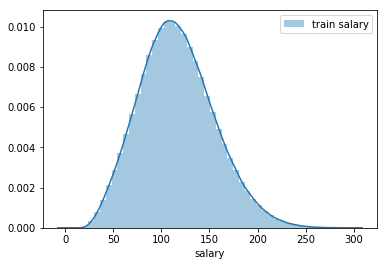

In [5]:
plt.figure()
sb.distplot(trainFinal['salary'], label='train salary')
plt.legend()
print(trainFinal['salary'].mean(axis=0))

In [8]:
trainFinal.groupby(['industry']).first()

,companyId,jobType,degree,major,yearsExperience,milesFromMetropolis,salary
industry,,,,,,,
AUTO,COMP38,MANAGER,DOCTORAL,CHEMISTRY,8,17,142
EDUCATION,COMP24,JUNIOR,BACHELORS,CHEMISTRY,9,70,73
FINANCE,COMP7,VICE_PRESIDENT,BACHELORS,PHYSICS,8,16,163
HEALTH,COMP37,CFO,MASTERS,MATH,10,83,130
OIL,COMP4,JUNIOR,NONE,NONE,8,29,79
SERVICE,COMP20,CTO,MASTERS,BIOLOGY,13,8,172
WEB,COMP19,CEO,HIGH_SCHOOL,NONE,3,73,101


In [9]:
trainFinal.groupby(['jobType']).first()

,companyId,degree,major,industry,yearsExperience,milesFromMetropolis,salary
jobType,,,,,,,
CEO,COMP19,HIGH_SCHOOL,NONE,WEB,3,73,101
CFO,COMP37,MASTERS,MATH,HEALTH,10,83,130
CTO,COMP20,MASTERS,BIOLOGY,SERVICE,13,8,172
JANITOR,COMP20,HIGH_SCHOOL,NONE,EDUCATION,1,54,31
JUNIOR,COMP24,BACHELORS,CHEMISTRY,EDUCATION,9,70,73
MANAGER,COMP38,DOCTORAL,CHEMISTRY,AUTO,8,17,142
SENIOR,COMP31,DOCTORAL,BUSINESS,EDUCATION,1,9,82
VICE_PRESIDENT,COMP52,DOCTORAL,PHYSICS,HEALTH,10,38,137


In [10]:
trainFinal.groupby(['degree']).first() # degree none?

,companyId,jobType,major,industry,yearsExperience,milesFromMetropolis,salary
degree,,,,,,,
BACHELORS,COMP7,VICE_PRESIDENT,PHYSICS,FINANCE,8,16,163
DOCTORAL,COMP52,VICE_PRESIDENT,PHYSICS,HEALTH,10,38,137
HIGH_SCHOOL,COMP19,CEO,NONE,WEB,3,73,101
MASTERS,COMP37,CFO,MATH,HEALTH,10,83,130
NONE,COMP15,CFO,NONE,HEALTH,23,24,178


In [11]:
trainFinal.groupby(['major']).first()

,companyId,jobType,degree,industry,yearsExperience,milesFromMetropolis,salary
major,,,,,,,
BIOLOGY,COMP20,CTO,MASTERS,SERVICE,13,8,172
BUSINESS,COMP34,CTO,MASTERS,AUTO,9,6,130
CHEMISTRY,COMP38,MANAGER,DOCTORAL,AUTO,8,17,142
COMPSCI,COMP15,MANAGER,DOCTORAL,FINANCE,2,31,113
ENGINEERING,COMP30,MANAGER,DOCTORAL,WEB,22,14,206
LITERATURE,COMP61,VICE_PRESIDENT,MASTERS,SERVICE,23,43,126
MATH,COMP37,CFO,MASTERS,HEALTH,10,83,130
NONE,COMP19,CEO,HIGH_SCHOOL,WEB,3,73,101
PHYSICS,COMP52,VICE_PRESIDENT,DOCTORAL,HEALTH,10,38,137


## Convert Categorical data to numerical for regression using Label Encoder

In [4]:
train_catX = trainFinal.select_dtypes(include=[object])
train_catX.head(3)

,companyId,jobType,degree,major,industry
jobId,,,,,
JOB1362684407687,COMP37,CFO,MASTERS,MATH,HEALTH
JOB1362684407688,COMP19,CEO,HIGH_SCHOOL,NONE,WEB
JOB1362684407689,COMP52,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH


In [5]:
le = preprocessing.LabelEncoder()
train_catX2 = train_catX.apply(le.fit_transform)
train_catX2.head(3)

,companyId,jobType,degree,major,industry
jobId,,,,,
JOB1362684407687,31,1,3,6,3
JOB1362684407688,11,0,2,7,6
JOB1362684407689,48,7,1,8,3


In [47]:
train_catX2.groupby(['industry']).first() 

,companyId,jobType,degree,major
industry,,,,
0,32,5,1,2
1,17,4,0,2
2,60,7,0,8
3,31,1,3,6
4,34,4,4,7
5,13,2,3,0
6,11,0,2,7


In [6]:
train = train_catX2.join(trainFinal[trainFinal.columns[5:8]],how='outer')
#Normalize data
Y = train[train.columns[7]].values
scaler = MinMaxScaler()
scaled_values = scaler.fit_transform(train)
X = scaled_values

## Fit regression model

In [ ]:
param_dist = {
 'n_estimators': [50,100],
 'learning_rate' : [1,.5,.1,.01]
 }

clf = GridSearchCV(AdaBoostRegressor(),
 param_grid = param_dist,
 cv=10, verbose=100,n_jobs=4)
clf.fit(X, Y)

In [180]:
clf.best_params_

{'learning_rate': 1, 'n_estimators': 50}

# Lets Predict

In [14]:
# Predict- 
Y_pred = clf.predict(X)
print(mean_squared_error(Y, Y_pred))
print(Y_pred, Y)

14.6940929409
[ 129.61383297   95.49127136  133.19849515 ...,   73.97956443  149.17381249
   93.79463684] [130 101 137 ...,  64 149  88]


### Scale test features

In [155]:
test_catX = testFeatures.select_dtypes(include=[object])
test_catX.head(3)
test_catX = test_catX.dropna()

In [157]:
test_catX2 = test_catX.apply(le.fit_transform)
test_catX2.head(3)

,companyId,jobType,degree,major,industry
jobId,,,,,
JOB1362685407687,27,6,3,8,4
JOB1362685407688,5,5,5,8,1
JOB1362685407689,2,3,4,1,4


In [160]:
test = test_catX2.join(testFeatures[testFeatures.columns[5:7]],how='outer')
#Normalize data
test = test.dropna()
scaler = MinMaxScaler()
scaled_values = scaler.fit_transform(test)
testX = scaled_values